In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crime-incidents-in-los-angeles-2020-to-present/Crime_Data_from_2020_to_Present.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = '/kaggle/input/crime-incidents-in-los-angeles-2020-to-present/Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(url)

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.669510e+05,966951.000000,966951.000000,966951.000000,966951.000000,966951.000000,966951.000000,966937.000000,325476.000000,966940.000000,68656.000000,2302.000000,64.00000,966951.000000,966951.000000
mean,2.193982e+08,1338.527823,10.709131,1117.347158,1.406110,500.669410,29.255533,306.113877,363.765344,500.420543,958.131423,984.150304,991.21875,33.994432,-118.077857
std,1.276448e+07,651.932723,6.104141,610.495051,0.491106,206.527476,21.935881,218.295446,123.648010,206.323015,110.282275,51.578870,27.06985,1.649863,5.718652
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.105170e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430700
50%,2.207183e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.308138e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499187e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [4]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           140376
Vict Age               0
Vict Sex          133706
Vict Descent      133716
Premis Cd             14
Premis Desc          576
Weapon Used Cd    641475
Weapon Desc       641475
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          898295
Crm Cd 3          964649
Crm Cd 4          966887
LOCATION               0
Cross Street      816733
LAT                    0
LON                    0
dtype: int64

In [5]:
df['Mocodes'].fillna('Unknown', inplace=True)
df['Vict Sex'].fillna('Unknown', inplace=True)
df['Vict Descent'].fillna('Unknown', inplace=True)
df['Premis Cd'].fillna('Unknown', inplace=True)
df['Premis Desc'].fillna('Unknown', inplace=True)
df['Weapon Used Cd'].fillna('No Weapon', inplace=True)
df['Weapon Desc'].fillna('No Weapon', inplace=True)
df.dropna(subset=['Status'], inplace=True)
df.dropna(subset=['Crm Cd 1'], inplace=True)
df['Cross Street'].fillna('Unknown', inplace=True)

df.isnull().sum()


/tmp/ipykernel_18/2103842338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mocodes'].fillna('Unknown', inplace=True)
/tmp/ipykernel_18/2103842338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age               0
Vict Sex               0
Vict Descent           0
Premis Cd              0
Premis Desc            0
Weapon Used Cd         0
Weapon Desc            0
Status                 0
Status Desc            0
Crm Cd 1               0
Crm Cd 2          898294
Crm Cd 3          964637
Crm Cd 4          966875
LOCATION               0
Cross Street           0
LAT                    0
LON                    0
dtype: int64

In [6]:
df.shape

(966939, 28)

# <center> 1. Top 10 Most Criminal Areas in Los Angeles </center>

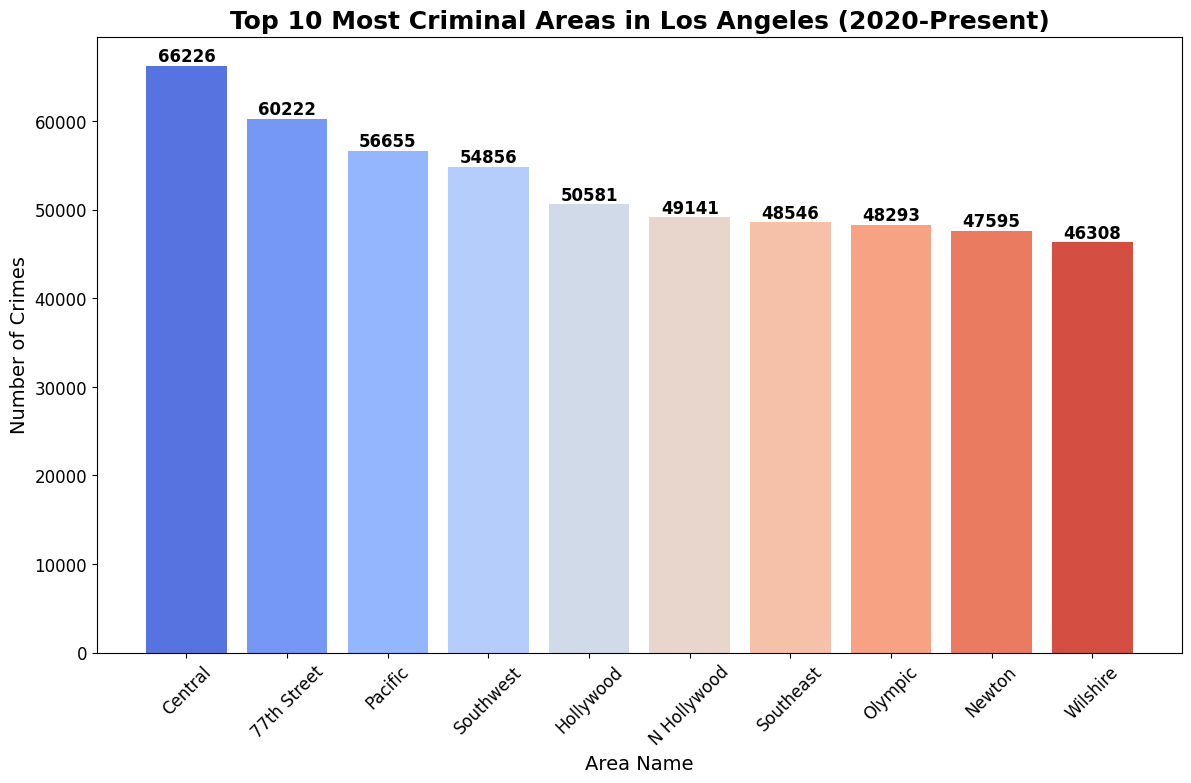

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_areas = df['AREA NAME'].value_counts().nlargest(10)
colors = sns.color_palette('coolwarm', len(top_10_areas))

plt.figure(figsize=(14, 8))
bars = plt.bar(top_10_areas.index, top_10_areas.values, color=colors)

plt.title('Top 10 Most Criminal Areas in Los Angeles (2020-Present)', fontsize=18, fontweight='bold')
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', fontsize=12, fontweight='bold')

plt.show()

# <center> 2: Top 10 Crime Types in Los Angeles </center>

In [8]:
import plotly.express as px

top_10_crimes = df['Crm Cd Desc'].value_counts().nlargest(10).reset_index()
top_10_crimes.columns = ['Crime Type', 'Count']

fig = px.treemap(top_10_crimes, path=['Crime Type'], values='Count',
                 color='Count', hover_data=['Crime Type'],
                 color_continuous_scale='Spectral')

fig.update_layout(title='Top 10 Crime Types in Los Angeles (2020-Present)', title_font_size=22)
fig.show()


# <center> 3: Top 10 Crime Types by Top 10 Areas </center>

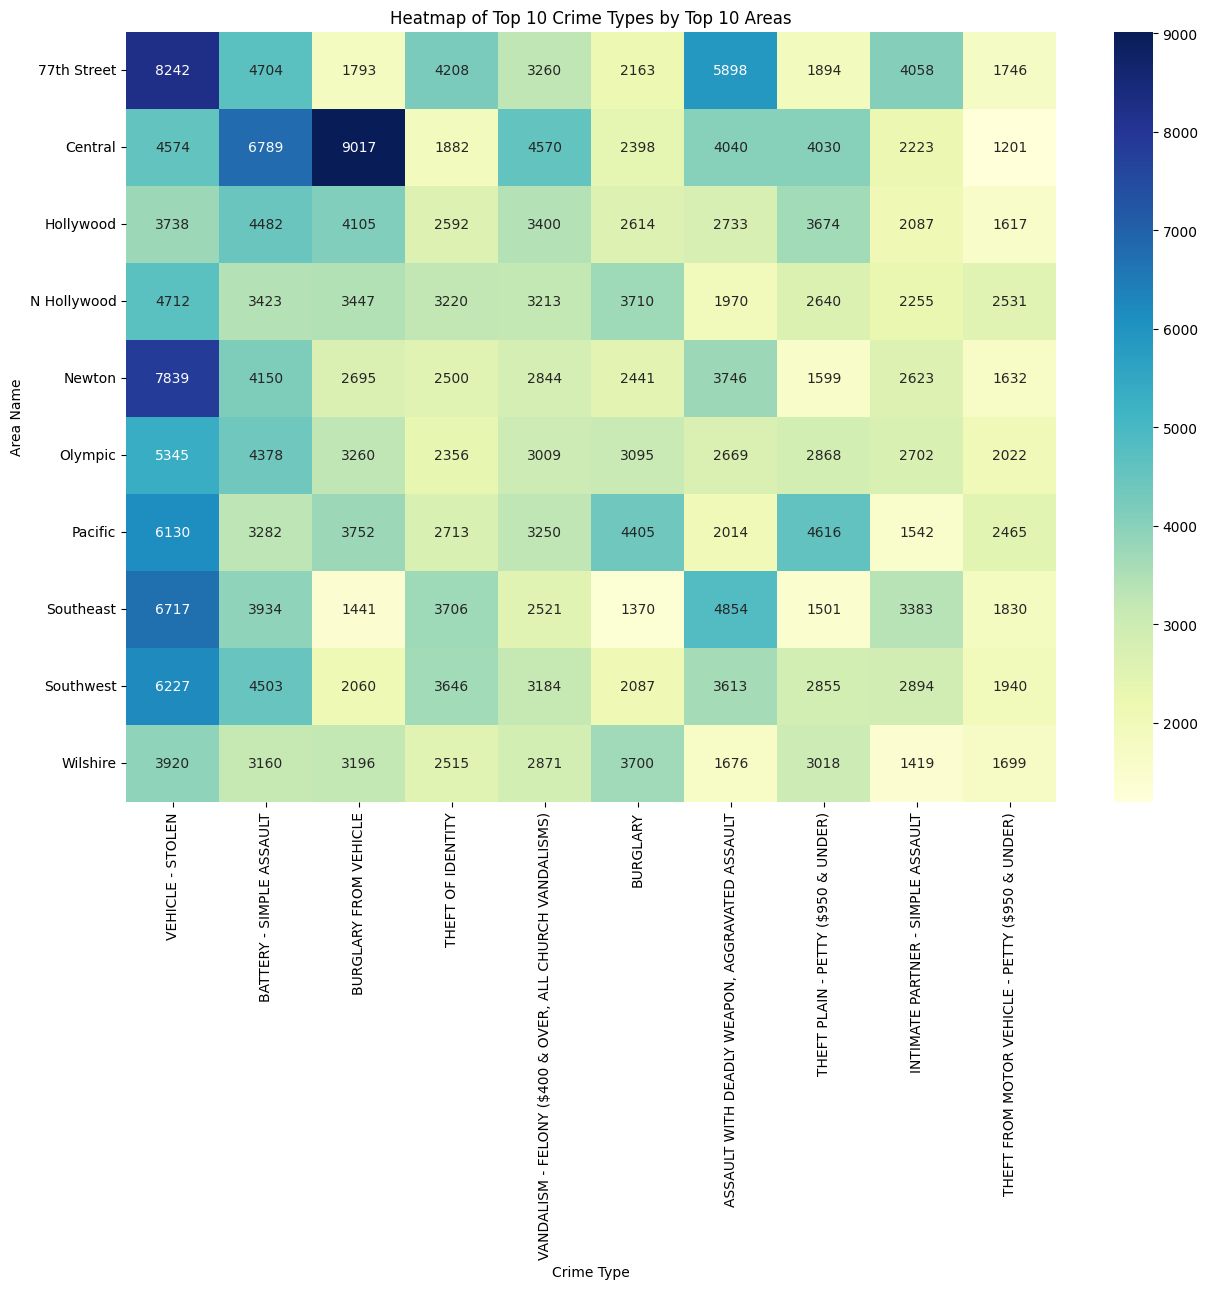

In [9]:
import seaborn as sns

top_10_crime_areas = df[df['AREA NAME'].isin(top_10_areas.index)]
crime_area_grouped = top_10_crime_areas.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack().fillna(0)
top_10_crime_types = df['Crm Cd Desc'].value_counts().nlargest(10).index

plt.figure(figsize=(15, 10))
sns.heatmap(crime_area_grouped[top_10_crime_types], cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Top 10 Crime Types by Top 10 Areas')
plt.xlabel('Crime Type')
plt.ylabel('Area Name')
plt.show()


# <center> 4: Victim Age Distribution by Top 10 Crime Types </center>

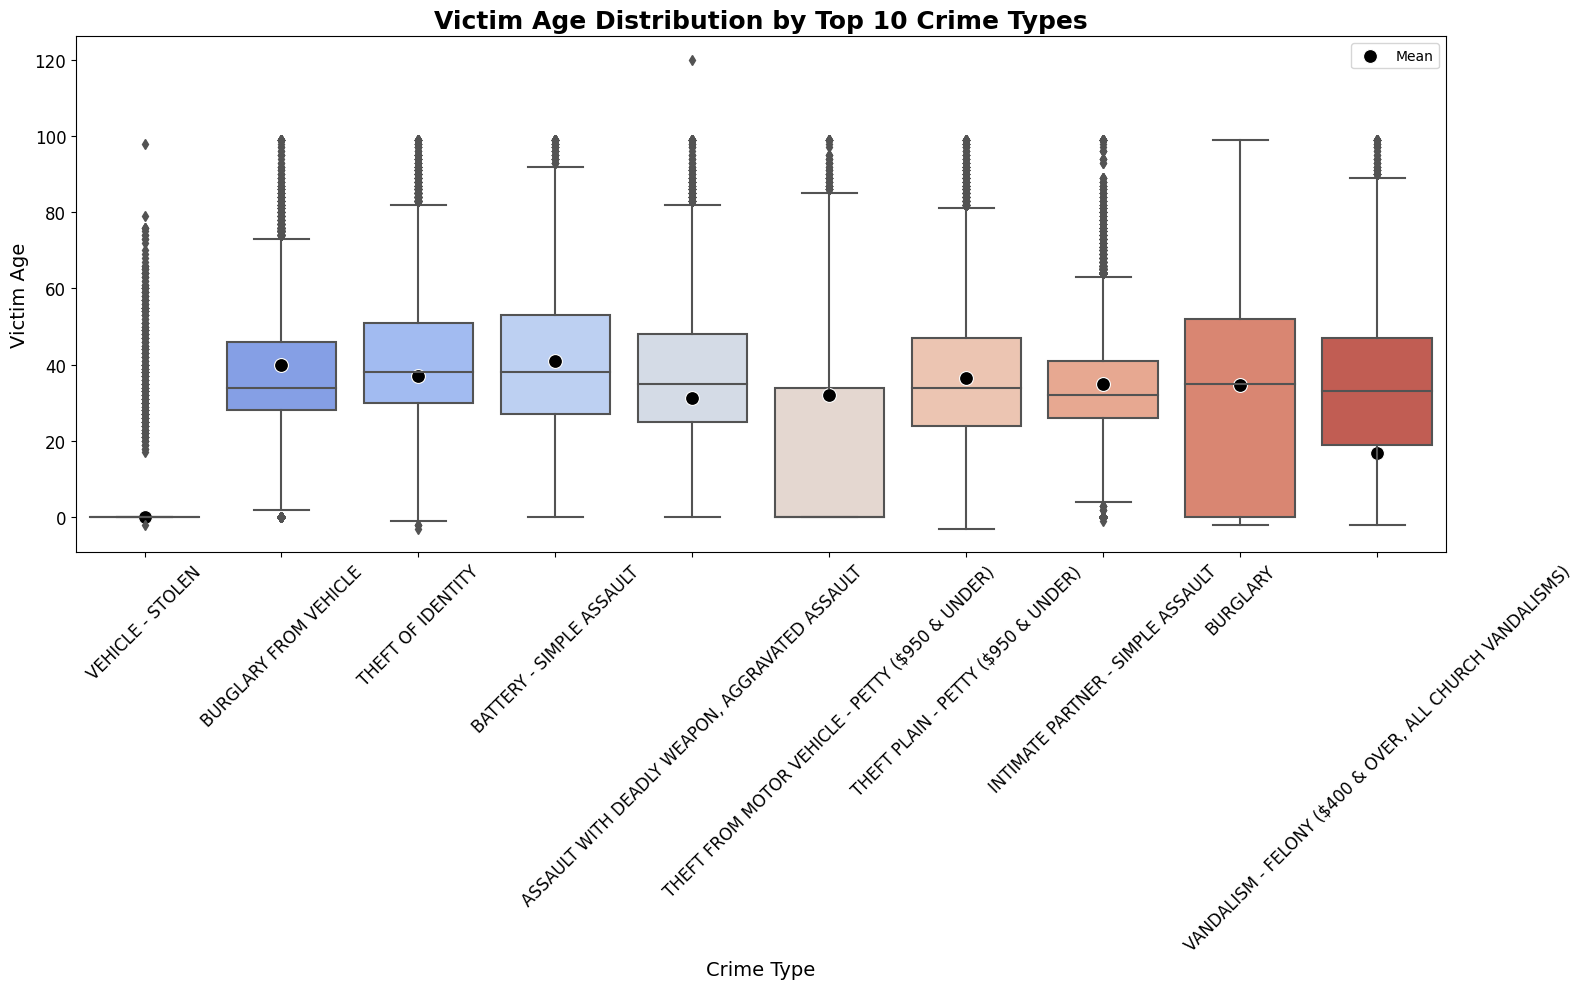

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_filtered = df.dropna(subset=['Vict Age'])
top_10_crimes_filtered = df_filtered['Crm Cd Desc'].value_counts().nlargest(10)

plt.figure(figsize=(16, 10))
top_10_crime_victims = df_filtered[df_filtered['Crm Cd Desc'].isin(top_10_crimes_filtered.index)]

sns.boxplot(x='Crm Cd Desc', y='Vict Age', data=top_10_crime_victims, palette='coolwarm')

mean_values = top_10_crime_victims.groupby('Crm Cd Desc')['Vict Age'].mean().reindex(top_10_crimes_filtered.index)
sns.scatterplot(x=top_10_crimes_filtered.index, y=mean_values, color='black', marker='o', s=100, label='Mean')

plt.title('Victim Age Distribution by Top 10 Crime Types', fontsize=18, fontweight='bold')
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Victim Age', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


# <center> 5: Top 10 Crime Types Funnel </center>

In [11]:
import plotly.express as px

crime_counts = df['Crm Cd Desc'].value_counts().nlargest(10).reset_index()
crime_counts.columns = ['Crime Type', 'Count']

fig = px.funnel(crime_counts, x='Count', y='Crime Type', color='Crime Type', title='Top 10 Crime Types Funnel')
fig.update_layout(title_font_size=22)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# <center>  6: Victim Age Distribution by Top 10 Crime Types </center>

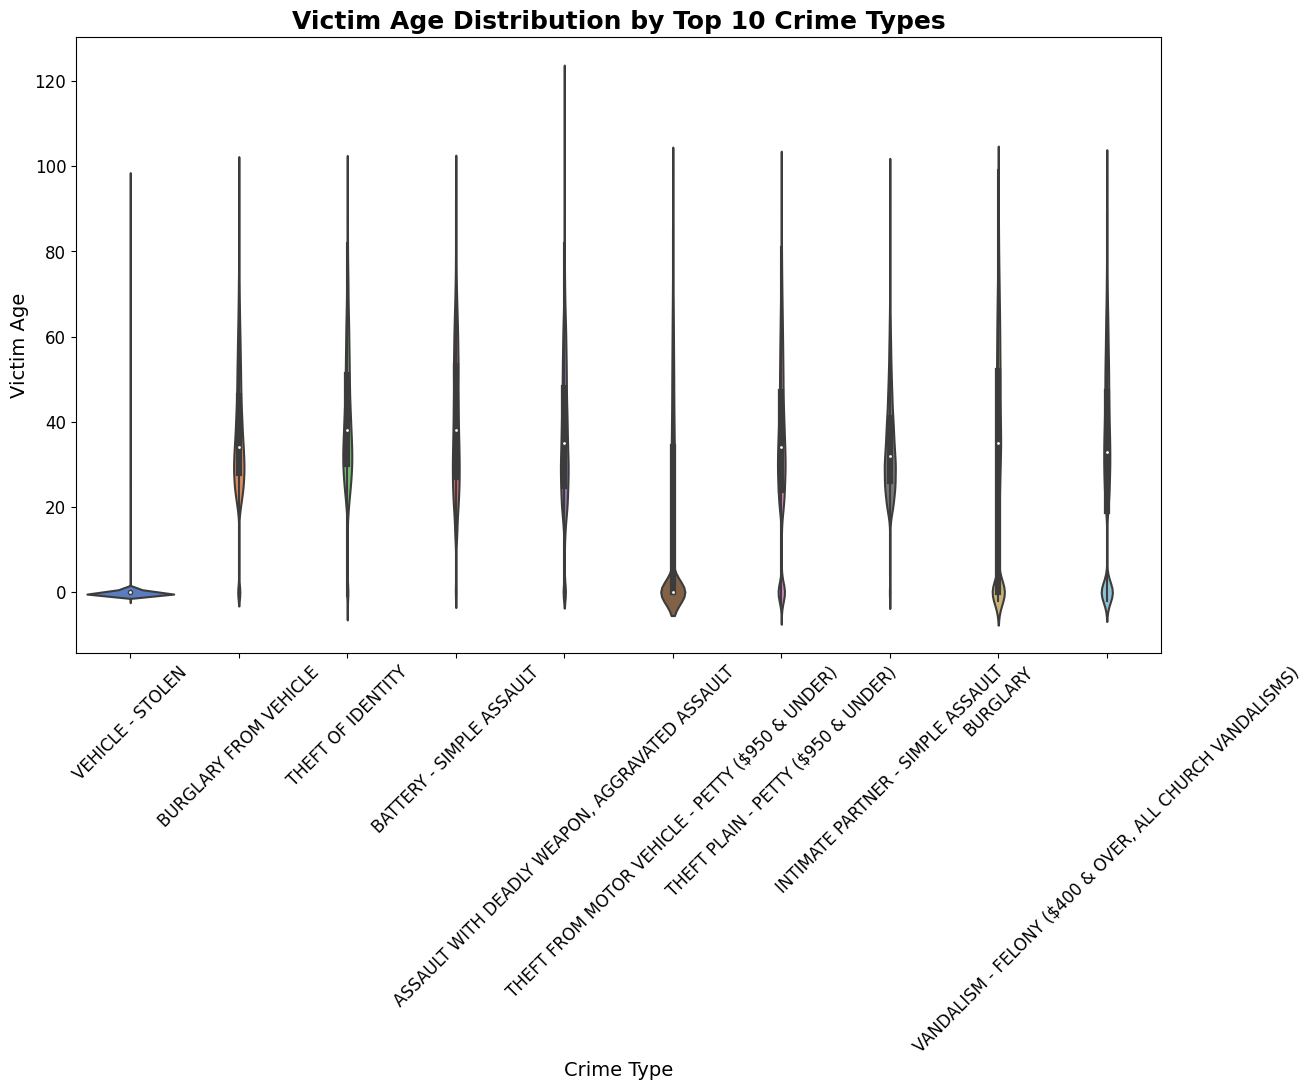

In [12]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Crm Cd Desc', y='Vict Age', data=top_10_crime_victims, palette='muted')
plt.title('Victim Age Distribution by Top 10 Crime Types', fontsize=18, fontweight='bold')
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Victim Age', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# <center> 7: Crime Types in Top 10 Areas </center>

In [13]:
import plotly.express as px

top_10_crime_areas = df[df['AREA NAME'].isin(top_10_areas.index)]
area_crime_counts = top_10_crime_areas.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Crime Count')

fig = px.scatter(area_crime_counts, x='AREA NAME', y='Crime Count', size='Crime Count', color='Crm Cd Desc',
                 hover_name='Crm Cd Desc', title='Crime Types in Top 10 Areas',
                 labels={'AREA NAME': 'Area Name', 'Crime Count': 'Number of Crimes'})
fig.update_layout(title_font_size=22)
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# <center>  8: Crime Types by Area </center>

In [14]:
import plotly.express as px

fig = px.sunburst(area_crime_counts, path=['AREA NAME', 'Crm Cd Desc'], values='Crime Count',
                  color='Crime Count', color_continuous_scale='RdBu',
                  title='Sunburst of Crime Types by Area')
fig.update_layout(title_font_size=22)
fig.show()


#  <center> 9: Crime Distribution by Time of Day </center>

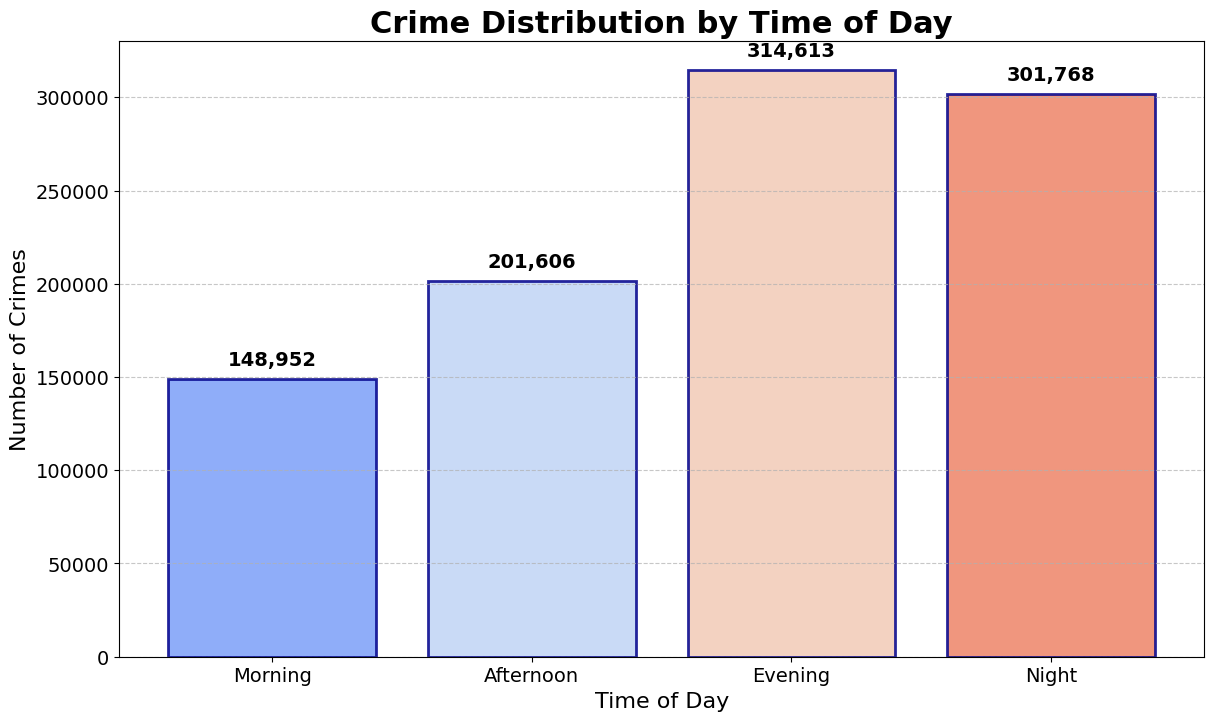

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered['Hour'] = df_filtered['TIME OCC'] // 100
time_bins = [0, 6, 12, 18, 24]
time_labels = [ 'Morning', 'Afternoon', 'Evening', 'Night']
df_filtered['Time of Day'] = pd.cut(df_filtered['Hour'], bins=time_bins, labels=time_labels, right=False)

time_distribution = df_filtered['Time of Day'].value_counts().reindex(time_labels)

plt.figure(figsize=(14, 8))
colors = sns.color_palette('coolwarm', len(time_distribution))

bars = plt.bar(time_distribution.index, time_distribution.values, color=colors, edgecolor='darkblue', linewidth=2, alpha=0.85)

plt.title('Crime Distribution by Time of Day', fontsize=22, fontweight='bold')
plt.xlabel('Time of Day', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{yval:,}', ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


# <center> 10: Crime Types in Top 10 Areas </center>

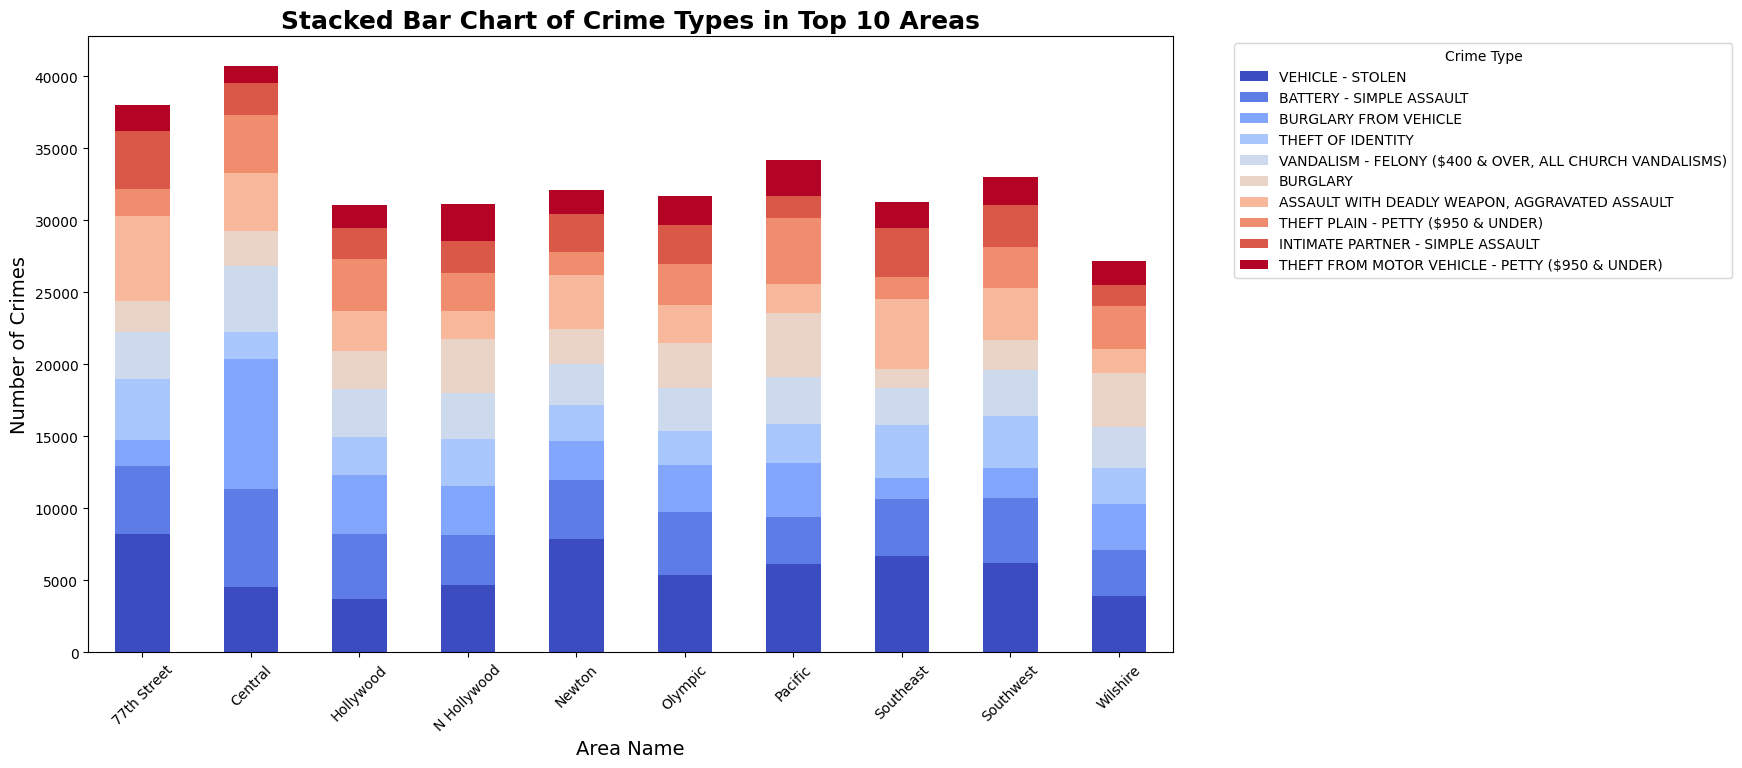

In [16]:
top_10_crime_types = df_filtered['Crm Cd Desc'].value_counts().nlargest(10).index
top_10_crime_areas_types = df_filtered[df_filtered['Crm Cd Desc'].isin(top_10_crime_types) & df_filtered['AREA NAME'].isin(top_10_areas.index)]
area_crime_type_grouped = top_10_crime_areas_types.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack().fillna(0)

area_crime_type_grouped[top_10_crime_types].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('Stacked Bar Chart of Crime Types in Top 10 Areas', fontsize=18, fontweight='bold')
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# <center> 11: Victim Gender Distribution for Top 10 Crime Types </center>

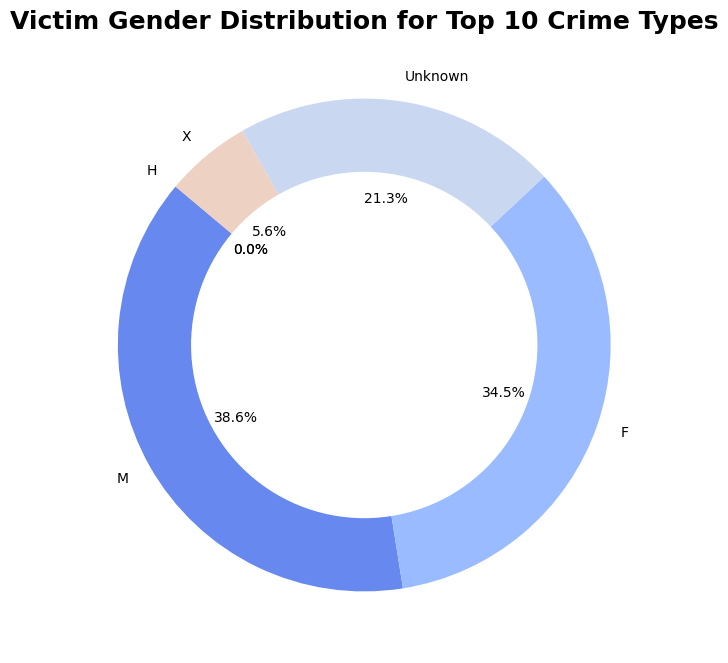

In [17]:
victim_sex_distribution = df_filtered[df_filtered['Crm Cd Desc'].isin(top_10_crime_types)]['Vict Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(victim_sex_distribution, labels=victim_sex_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title('Victim Gender Distribution for Top 10 Crime Types', fontsize=18, fontweight='bold')
plt.show()


# <center> 12: Crime Count in Top 10 Areas Over Time </center>

In [18]:
import plotly.express as px

df_filtered['DATE OCC'] = pd.to_datetime(df_filtered['DATE OCC'], errors='coerce')

df_filtered['YearMonth'] = df_filtered['DATE OCC'].dt.to_period('M')

top_10_areas_time = df_filtered[df_filtered['AREA NAME'].isin(top_10_areas.index)]
area_time_grouped = top_10_areas_time.groupby(['YearMonth', 'AREA NAME']).size().reset_index(name='Crime Count')

fig = px.bar(area_time_grouped, x='AREA NAME', y='Crime Count', color='AREA NAME', animation_frame='YearMonth',
             title='Crime Count in Top 10 Areas Over Time', labels={'AREA NAME': 'Area Name', 'Crime Count': 'Number of Crimes'})
fig.update_layout(title_font_size=22)
fig.show()


/tmp/ipykernel_18/2861916330.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



# <center> 13: Top 10 Crime Types in Los Angeles </center>

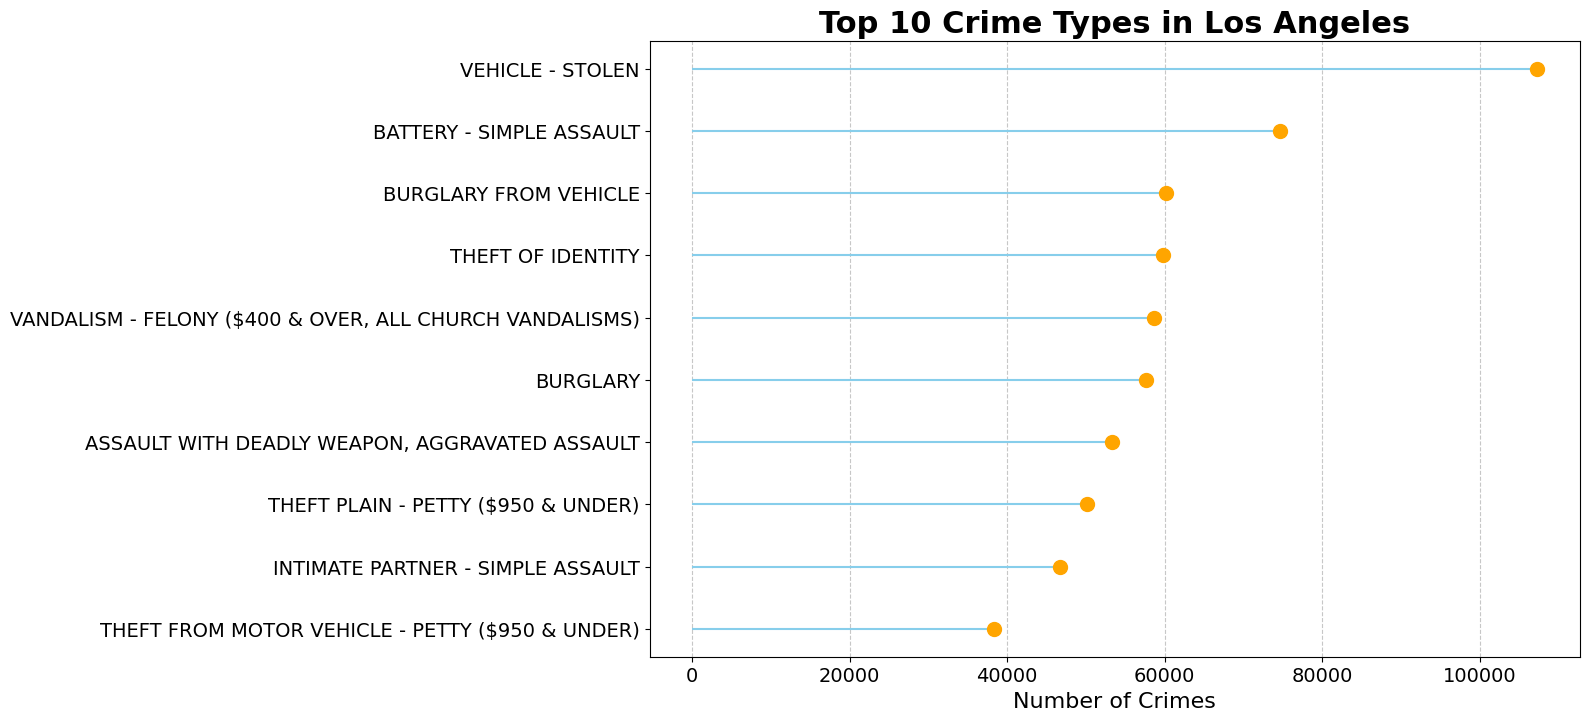

In [19]:
import matplotlib.pyplot as plt
import numpy as np

top_10_crimes_sorted = top_10_crimes_filtered.sort_values(ascending=True)

plt.figure(figsize=(12, 8))
plt.hlines(y=top_10_crimes_sorted.index, xmin=0, xmax=top_10_crimes_sorted.values, color='skyblue')
plt.plot(top_10_crimes_sorted.values, top_10_crimes_sorted.index, "o", color='orange', markersize=10)

plt.title('Top 10 Crime Types in Los Angeles', fontsize=22, fontweight='bold')
plt.xlabel('Number of Crimes', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


# <center> 14: Crime Change from 2020 to 2023 in Top 10 Areas  </center>

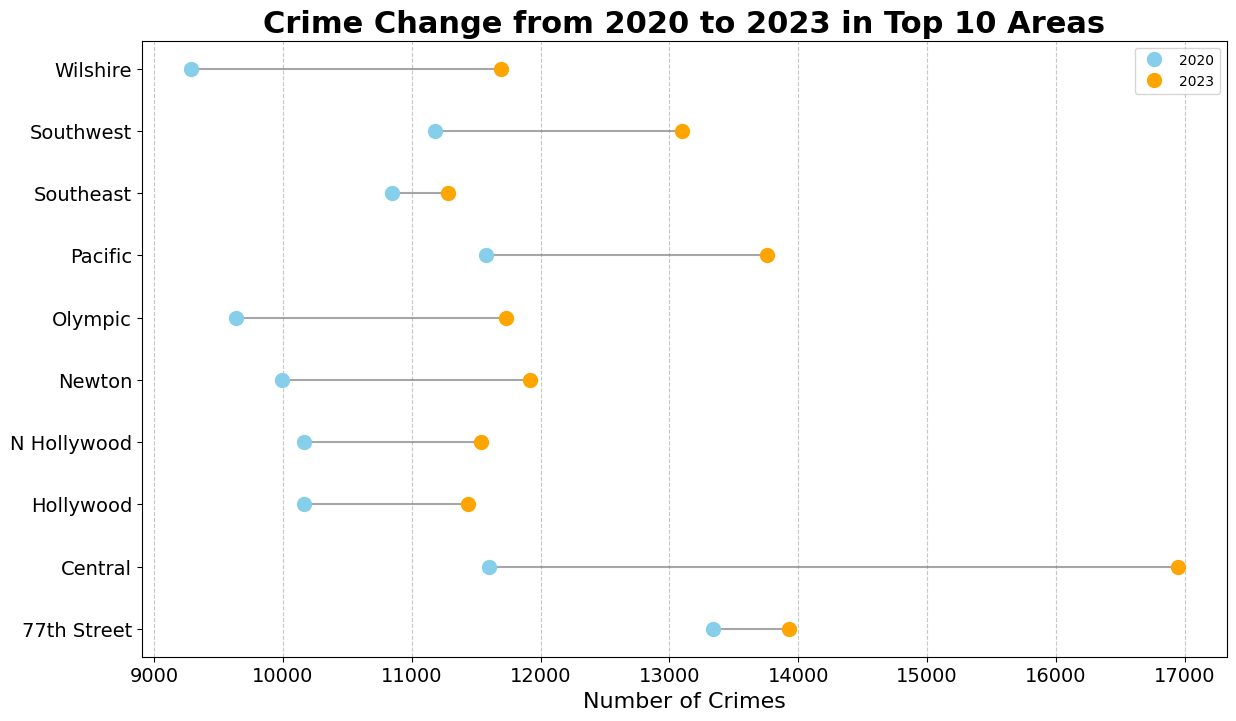

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df_filtered['Year'] = df_filtered['DATE OCC'].dt.year
crime_years = df_filtered[df_filtered['AREA NAME'].isin(top_10_areas.index)].groupby(['AREA NAME', 'Year']).size().unstack()

year1, year2 = 2020, 2023
crime_change = crime_years[[year1, year2]].dropna()

plt.figure(figsize=(14, 8))
plt.hlines(y=crime_change.index, xmin=crime_change[year1], xmax=crime_change[year2], color='grey', alpha=0.7)
plt.plot(crime_change[year1], crime_change.index, "o", label=f'{year1}', color='skyblue', markersize=10)
plt.plot(crime_change[year2], crime_change.index, "o", label=f'{year2}', color='orange', markersize=10)

plt.title(f'Crime Change from {year1} to {year2} in Top 10 Areas', fontsize=22, fontweight='bold')
plt.xlabel('Number of Crimes', fontsize=16)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


# <center>  15: Correlation Matrix of Crime Characteristics </center>

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px

df_filtered.replace('Unknown', np.nan, inplace=True)
df_filtered['Vict Age'] = pd.to_numeric(df_filtered['Vict Age'], errors='coerce')
df_filtered['TIME OCC'] = pd.to_numeric(df_filtered['TIME OCC'], errors='coerce')
df_filtered['Premis Cd'] = pd.to_numeric(df_filtered['Premis Cd'], errors='coerce')
df_filtered['Crm Cd'] = pd.to_numeric(df_filtered['Crm Cd'], errors='coerce')

correlation_matrix = df_filtered[['Vict Age', 'TIME OCC', 'Premis Cd', 'Crm Cd']].corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", title="Correlation Matrix of Crime Characteristics")
fig.update_layout(title_font_size=22)
fig.show()


/tmp/ipykernel_18/2448188748.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# <center>  16. Parallel Coordinates Plot of Crime Characteristics </center>

In [22]:
import plotly.express as px

df_sampled = df_filtered[df_filtered['Crm Cd Desc'].isin(top_10_crimes_filtered.index)].sample(500, random_state=42)

fig = px.parallel_coordinates(df_sampled,
                              dimensions=['Vict Age', 'TIME OCC', 'Premis Cd', 'Crm Cd'],
                              color='Crm Cd', color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Coordinates Plot of Crime Characteristics')

fig.update_layout(title_font_size=22)
fig.show()


# <center> 17:  3D Scatter Plot of Crime Data in Los Angeles </center>

In [23]:
import plotly.express as px

df_sampled = df_filtered[df_filtered['Crm Cd Desc'].isin(top_10_crimes_filtered.index)].sample(1000, random_state=42)

fig = px.scatter_3d(df_sampled,
                    x='AREA NAME', y='Vict Age', z='TIME OCC', color='Crm Cd Desc',
                    title='3D Scatter Plot of Crime Data in Los Angeles',
                    labels={'AREA NAME': 'Area Name', 'Vict Age': 'Victim Age', 'TIME OCC': 'Time of Occurrence'},
                    opacity=0.7, size_max=5)

fig.update_layout(title_font_size=22)
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#  <center> 18: Treemap of Crime Types by Area  </center>

In [24]:
import plotly.express as px

fig = px.treemap(df_filtered[df_filtered['Crm Cd Desc'].isin(top_10_crimes_filtered.index)],
                 path=['AREA NAME', 'Crm Cd Desc'], values='Vict Age',
                 color='Vict Age', hover_data=['Crm Cd Desc'],
                 color_continuous_scale='RdBu', title='Treemap of Crime Types by Area')

fig.update_layout(title_font_size=22)
fig.show()


--------------------

# <center> If you liked the code, please make an ⬆️ upvote  ⬆️  </center>

---------------------